In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('customers.csv')

In [3]:
df

CLIENTNUM     Attrition_Flag  Age Gender  Dependent_count  \
0      768805383  Existing Customer   45      M                3   
1      818770008  Existing Customer   49      F                5   
2      713982108  Existing Customer   51      M                3   
3      769911858  Existing Customer   40      F                4   
4      709106358  Existing Customer   40      M                3   
...          ...                ...  ...    ...              ...   
10122  772366833  Existing Customer   50      M                2   
10123  710638233  Attrited Customer   41      M                2   
10124  716506083  Attrited Customer   44      F                1   
10125  717406983  Attrited Customer   30      M                2   
10126  714337233  Attrited Customer   43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                  39  ...                       1                      3   
1                  44  ...                       1                      2   
2                  36  ...                       1                      0   
3                  34  ...                       4                      1   
4                  21  ...                       1                      0   
...               ...  ...                     ...                    ...   
10122              40  ...                       2                      3   
10123              25  ...                       2                      3   
10124              36  ...                       3                      4   
10125              36  ...                       3                      3   
10126              25  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0           12691.0                  777          11914.0   
1            8256.0                  864           7392.0   
2            3418.0                    0           3418.0   
3            3313.0                 2517            796.0   
4            4716.0                    0           4716.0   
...             ...                  ...              ...   
10122        4003.0                 1851           2152.0   
10123        4277.0                 2186           2091.0   
10124        5409.0                    0           5409.0   
10125        5281.0                    0           5281.0   
10126       10388.0                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                     1.335             1144              42   
1                     1.541             1291              33   
2                     2.594             1887              20   
3                     1.405             1171              20   
4                     2.175              816              28   
...                     ...              ...             ...   
10122                 0.703            15476             117   
10123                 0.804             8764              69   
10124                 0.819            10291              60   
10125                 0.535             8395       

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Age                       10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [5]:
# Data Cleaning
# Task 1: Handling Missing Values
df.dropna(inplace=True)

# Task 2: Removing Duplicates
df.drop_duplicates(inplace=True)

df_cleaned = df[(df['Education_Level'] != 'Unknown') & (df['Marital_Status'] != 'Unknown') & (df['Income_Category'] != 'Unknown')]

In [6]:
df_cleaned

CLIENTNUM     Attrition_Flag  Age Gender  Dependent_count  \
0      768805383  Existing Customer   45      M                3   
1      818770008  Existing Customer   49      F                5   
2      713982108  Existing Customer   51      M                3   
4      709106358  Existing Customer   40      M                3   
5      713061558  Existing Customer   44      M                2   
...          ...                ...  ...    ...              ...   
10120  710841183  Existing Customer   54      M                1   
10121  713899383  Existing Customer   56      F                1   
10122  772366833  Existing Customer   50      M                2   
10124  716506083  Attrited Customer   44      F                1   
10126  714337233  Attrited Customer   43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
5            Graduate        Married     $40K - $60K          Blue   
...               ...            ...             ...           ...   
10120     High School         Single     $60K - $80K          Blue   
10121        Graduate         Single  Less than $40K          Blue   
10122        Graduate         Single     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                  39  ...                       1                      3   
1                  44  ...                       1                      2   
2                  36  ...                       1                      0   
4                  21  ...                       1                      0   
5                  36  ...                       1                      2   
...               ...  ...                     ...                    ...   
10120              34  ...                       2                      0   
10121              50  ...                       1                      4   
10122              40  ...                       2                      3   
10124              36  ...                       3                      4   
10126              25  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0           12691.0                  777          11914.0   
1            8256.0                  864           7392.0   
2            3418.0                    0           3418.0   
4            4716.0                    0           4716.0   
5            4010.0                 1247           2763.0   
...             ...                  ...              ...   
10120       13940.0                 2109          11831.0   
10121        3688.0                  606           3082.0   
10122        4003.0                 1851           2152.0   
10124        5409.0                    0           5409.0   
10126       10388.0                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                     1.335             1144              42   
1                     1.541             1291              33   
2                     2.594             1887              20   
4                     2.175              816              28   
5                     1.376             1088              24   
...                     ...              ...             ...   
10120                 0.660            15577             114   
10121                 0.570            14596             120   
10122                 0.703            15476             117   
10124                 0.819            10291       

In [7]:
# Data Transformation
# Task 1: Feature Scaling (e.g., Min-Max Scaling)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_cleaned[['Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1']] = scaler.fit_transform(df_cleaned[['Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1']])



<ipython-input-7-3f285dd69dd6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[['Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1']] = scaler.fit_transform(df_cleaned[['Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1']])


In [8]:
df_cleaned

CLIENTNUM     Attrition_Flag  Age Gender  Dependent_count  \
0      768805383  Existing Customer   45      M                3   
1      818770008  Existing Customer   49      F                5   
2      713982108  Existing Customer   51      M                3   
4      709106358  Existing Customer   40      M                3   
5      713061558  Existing Customer   44      M                2   
...          ...                ...  ...    ...              ...   
10120  710841183  Existing Customer   54      M                1   
10121  713899383  Existing Customer   56      F                1   
10122  772366833  Existing Customer   50      M                2   
10124  716506083  Attrited Customer   44      F                1   
10126  714337233  Attrited Customer   43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
5            Graduate        Married     $40K - $60K          Blue   
...               ...            ...             ...           ...   
10120     High School         Single     $60K - $80K          Blue   
10121        Graduate         Single  Less than $40K          Blue   
10122        Graduate         Single     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                  39  ...                       1                      3   
1                  44  ...                       1                      2   
2                  36  ...                       1                      0   
4                  21  ...                       1                      0   
5                  36  ...                       1                      2   
...               ...  ...                     ...                    ...   
10120              34  ...                       2                      0   
10121              50  ...                       1                      4   
10122              40  ...                       2                      3   
10124              36  ...                       3                      4   
10126              25  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0           12691.0                  777          11914.0   
1            8256.0                  864           7392.0   
2            3418.0                    0           3418.0   
4            4716.0                    0           4716.0   
5            4010.0                 1247           2763.0   
...             ...                  ...              ...   
10120       13940.0                 2109          11831.0   
10121        3688.0                  606           3082.0   
10122        4003.0                 1851           2152.0   
10124        5409.0                    0           5409.0   
10126       10388.0                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                  0.392994             1144              42   
1                  0.453636             1291              33   
2                  0.763615             1887              20   
4                  0.640271              816              28   
5                  0.405063             1088              24   
...                     ...              ...             ...   
10120              0.194289            15577             114   
10121              0.167795            14596             120   
10122              0.206947            15476             117   
10124              0.241095            10291       

In [9]:
# Task 2: One-Hot Encoding (if categorical variables exist)
df_cleaned = pd.get_dummies(df_cleaned, columns=['Card_Category'])

In [10]:
df_cleaned

CLIENTNUM     Attrition_Flag  Age Gender  Dependent_count  \
0      768805383  Existing Customer   45      M                3   
1      818770008  Existing Customer   49      F                5   
2      713982108  Existing Customer   51      M                3   
4      709106358  Existing Customer   40      M                3   
5      713061558  Existing Customer   44      M                2   
...          ...                ...  ...    ...              ...   
10120  710841183  Existing Customer   54      M                1   
10121  713899383  Existing Customer   56      F                1   
10122  772366833  Existing Customer   50      M                2   
10124  716506083  Attrited Customer   44      F                1   
10126  714337233  Attrited Customer   43      F                2   

      Education_Level Marital_Status Income_Category  Months_on_book  \
0         High School        Married     $60K - $80K              39   
1            Graduate         Single  Less than $40K              44   
2            Graduate        Married    $80K - $120K              36   
4          Uneducated        Married     $60K - $80K              21   
5            Graduate        Married     $40K - $60K              36   
...               ...            ...             ...             ...   
10120     High School         Single     $60K - $80K              34   
10121        Graduate         Single  Less than $40K              50   
10122        Graduate         Single     $40K - $60K              40   
10124     High School        Married  Less than $40K              36   
10126        Graduate        Married  Less than $40K              25   

       Total_Relationship_Count  ...  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                             5  ...          11914.0              0.392994   
1                             6  ...           7392.0              0.453636   
2                             4  ...           3418.0              0.763615   
4                             5  ...           4716.0              0.640271   
5                             3  ...           2763.0              0.405063   
...                         ...  ...              ...                   ...   
10120                         5  ...          11831.0              0.194289   
10121                         4  ...           3082.0              0.167795   
10122                         3  ...           2152.0              0.206947   
10124                         5  ...           5409.0              0.241095   
10126                         6  ...           8427.0              0.206947   

       Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1144              42             0.437534   
1                 1291              33             1.000000   
2                 1887              20             0.628164   
4                  816              28             0.673129   
5                 1088              24             0.227787   
...                ...             ...                  ...   
10120            15577             114             0.203016   
10121            14596             120             0.212978   
10122            15476             117             0.230749   
10124            10291              60             0.220248   
10126            10294              61             0.174744   

       Avg_Utilization_Ratio  Card_Category_Blue  Card_Category_Gold  \
0                      0.061                   1                   0   
1                      0.105                   1                   0   
2                      0.000                   1                   0   
4                      0.000                   1                   0   
5                      0.311                   1                   0   
...                      ...                 ...                 ...   
10120                  0.151                   1                   0   
10121                  0.164               

In [11]:
# Data Reduction
# Task 1: Dimensionality Reduction (e.g., Principal Component Analysis - PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_cleaned[['Age', 'Months_on_book']])


In [12]:
# Data Discretization
# Task 1: Binning Numeric Data
df_cleaned['BinnedFeature'] = pd.cut(df_cleaned['Avg_Open_To_Buy'], bins=3, labels=['Low', 'Medium', 'High'])

# Task 2: Converting Continuous to Ordinal
df_cleaned['OrdinalFeature'] = pd.qcut(df_cleaned['Age'], q=3, labels=['Low', 'Medium', 'High'])

In [13]:
df_cleaned

CLIENTNUM     Attrition_Flag  Age Gender  Dependent_count  \
0      768805383  Existing Customer   45      M                3   
1      818770008  Existing Customer   49      F                5   
2      713982108  Existing Customer   51      M                3   
4      709106358  Existing Customer   40      M                3   
5      713061558  Existing Customer   44      M                2   
...          ...                ...  ...    ...              ...   
10120  710841183  Existing Customer   54      M                1   
10121  713899383  Existing Customer   56      F                1   
10122  772366833  Existing Customer   50      M                2   
10124  716506083  Attrited Customer   44      F                1   
10126  714337233  Attrited Customer   43      F                2   

      Education_Level Marital_Status Income_Category  Months_on_book  \
0         High School        Married     $60K - $80K              39   
1            Graduate         Single  Less than $40K              44   
2            Graduate        Married    $80K - $120K              36   
4          Uneducated        Married     $60K - $80K              21   
5            Graduate        Married     $40K - $60K              36   
...               ...            ...             ...             ...   
10120     High School         Single     $60K - $80K              34   
10121        Graduate         Single  Less than $40K              50   
10122        Graduate         Single     $40K - $60K              40   
10124     High School        Married  Less than $40K              36   
10126        Graduate        Married  Less than $40K              25   

       Total_Relationship_Count  ...  Total_Trans_Amt  Total_Trans_Ct  \
0                             5  ...             1144              42   
1                             6  ...             1291              33   
2                             4  ...             1887              20   
4                             5  ...              816              28   
5                             3  ...             1088              24   
...                         ...  ...              ...             ...   
10120                         5  ...            15577             114   
10121                         4  ...            14596             120   
10122                         3  ...            15476             117   
10124                         5  ...            10291              60   
10126                         6  ...            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Card_Category_Blue  \
0                 0.437534                  0.061                   1   
1                 1.000000                  0.105                   1   
2                 0.628164                  0.000                   1   
4                 0.673129                  0.000                   1   
5                 0.227787                  0.311                   1   
...                    ...                    ...                 ...   
10120             0.203016                  0.151                   1   
10121             0.212978                  0.164                   1   
10122             0.230749                  0.462                   1   
10124             0.220248                  0.000                   1   
10126             0.174744                  0.189                   0   

       Card_Category_Gold  Card_Category_Platinum  Card_Category_Silver  \
0                       0                       0                     0   
1                       0                       0                     0   
2                       0                       0                     0   
4                       0                       0                     0   
5                       0                       0                     0   
...                   ...                     ...                   ...   
10120                   0                     

In [18]:
df_cleaned.to_csv('res_dpre.csv', index=False)

In [15]:

# Perform data exploration and generate insights
insights = []

# Insight 1: Calculate the number of rows and columns
insight1 = f"Number of rows: {len(df_cleaned)}\nNumber of columns: {len(df_cleaned.columns)}"
insights.append(insight1)

# Insight 2: Calculate the mean and standard deviation of a numerical column
numeric_column = 'Age'  # Replace with an actual numerical column name
mean_age = np.mean(df_cleaned[numeric_column])
std_age = np.std(df_cleaned[numeric_column])
insight2 = f"Mean {numeric_column}: {mean_age:.2f}\nStd Deviation {numeric_column}: {std_age:.2f}"
insights.append(insight2)

# Insight 3: Identify the unique categories in a categorical column
categorical_column = 'Education_Level'  # Replace with an actual categorical column name
unique_categories = df_cleaned[categorical_column].unique()
insight3 = f"Unique categories in {categorical_column}: {', '.join(unique_categories)}"
insights.append(insight3)

# Save insights as text files
for i, insight in enumerate(insights, 1):
    with open(f'eda-in-{i}.txt', 'w') as f:
        f.write(insight)

print("Insights saved as text files.")

Insights saved as text files.


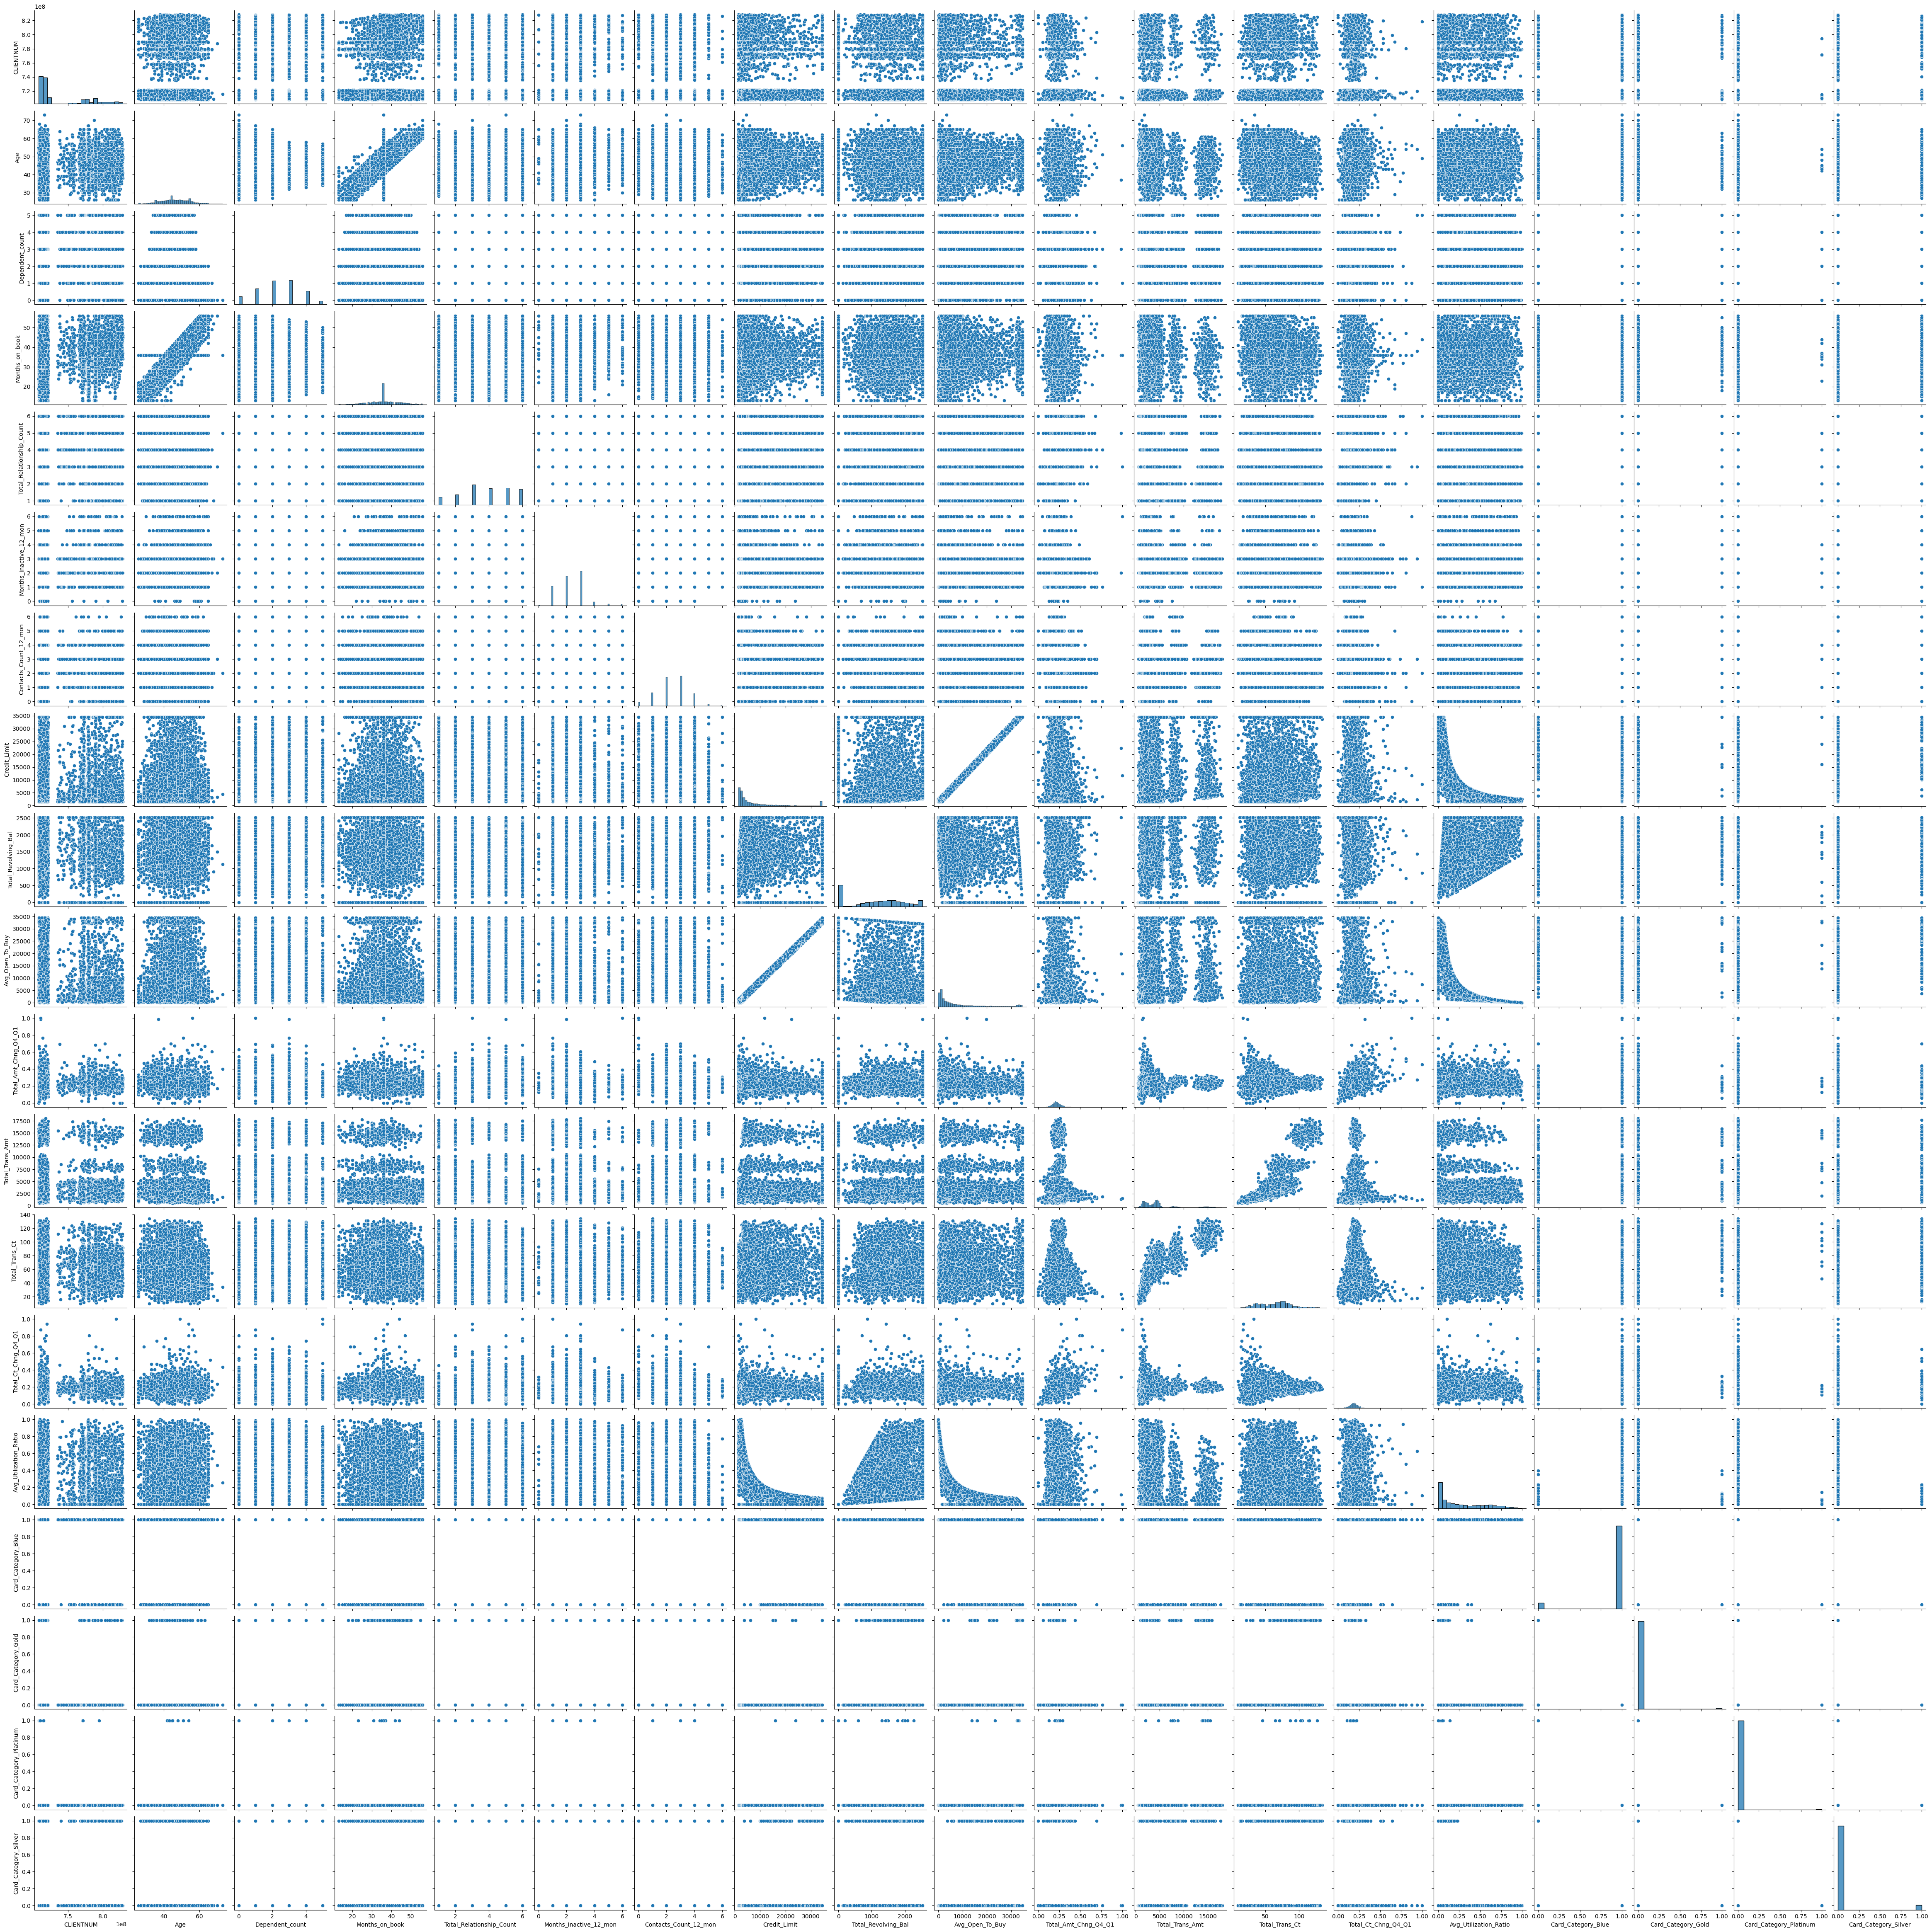

In [16]:
import seaborn as sns
sns.pairplot(df_cleaned)

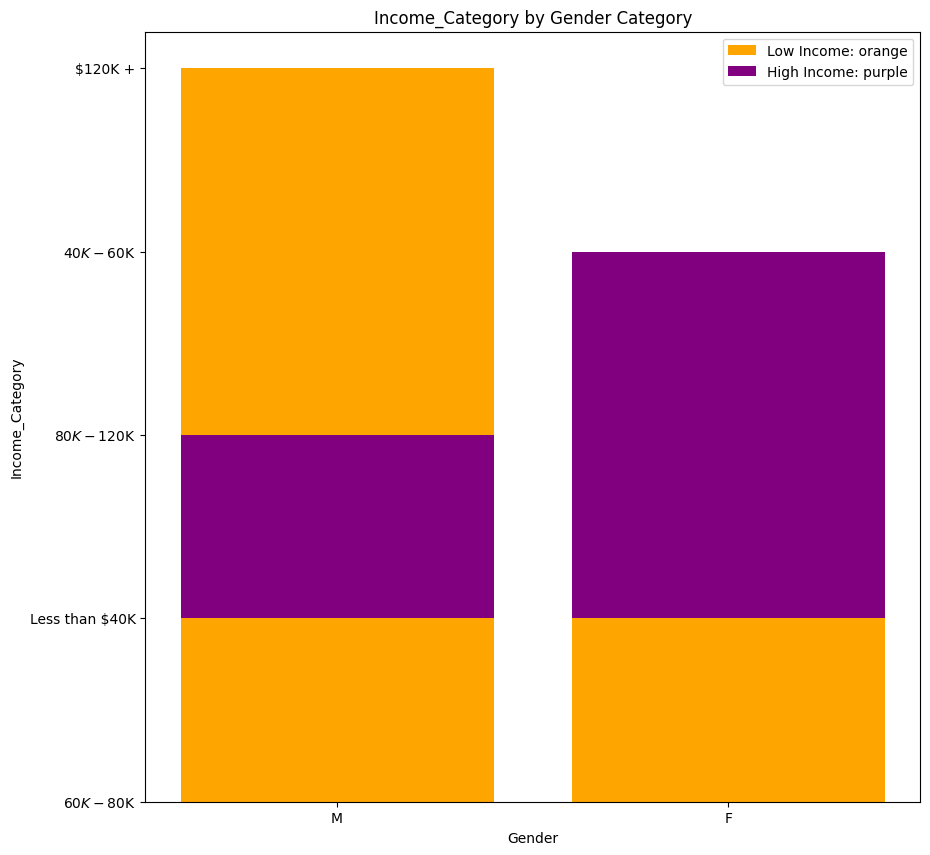

In [21]:
import matplotlib.pyplot as plt

selected_data = df_cleaned.loc[:200, ['Gender', 'Income_Category']]
x = selected_data['Gender']
y = selected_data['Income_Category']

# Define custom colors for each category
colors = ['orange', 'purple']

# Create a bar chart
plt.figure(figsize=(10, 10))
bars = plt.bar(x, y, color=colors)
plt.xlabel('Gender')
plt.ylabel('Income_Category')
plt.title('Income_Category by Gender Category')

# Create a legend
category_names = ['Low Income', 'High Income']  # Replace with your category names
legend_labels = [f'{category}: {color}' for category, color in zip(category_names, colors)]
plt.legend(bars, legend_labels)

# Save the visualization as vis.png
plt.savefig('vis.png')

# Display the chart (optional)
plt.show()
